**Project Context**: The HR department at a large software company is rolling out a new initiative that they call "Proactive Retention." The idea is to <i> **use data to predict whether an employee is likely to leave.** </i> Once these employees are identified, HR can be more proactive in reaching out to them before it's too late. For this initiative, they only care about **permanent (non-temp)** employees.

**Current Solution**:

Currently, their employee retention process is very retroactive. Once an employee leaves, he or she takes an "exit interview" and shares reasons for leaving. HR then tries to learn insights from that interview and make changes around the company accordingly.

This suffers from 3 main problems:

<ul>
<li>The first problem with this approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer. </li>
<li>The second problem is that they can't systematically aggregate insights across all employees who have left. </li>
<li>The third problem is that they can't be proactive because they are using exit interviews to drive policy changes. </li>
</ul>

**Task**:

The task here is to act as a data science consultant for the HR group and build a classification model using that dataset. They want to supplement their exit interviews with a more proactive approach. They've asked their business intelligence analysts to provide us a dataset of past employees and their status (still employed or already left).
 Because our solution will be complementary to the existing procedure, and because there's no precedent, we <i>**do not have a quantifiable win condition. Just build the best model possible.**</i>

A classification problem classifying employee retention based on attributes such as number of projects, number of hours worked, satisfaction, whether or not filed complaint, tenure, status, salary, etc.

<h2> Import Libraries </h2>

In [49]:
# Import print function for compatibility with Python 3
from __future__ import print_function
print('Print function ready to serve.')

#import os
import os

# Import numpy for numerical computing
import numpy as np

#Import pandas for data manipulation
import pandas as pd

#import matplotlib for visualization
from matplotlib import pyplot as plt

#display plots in the notebook
%matplotlib inline

#import seaborn for easier visualization
import seaborn as sns

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Classification metrics
from sklearn.metrics import roc_curve, auc

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Pickle for saving model files
import pickle

Print function ready to serve.


In [2]:
os.getcwd()

'/Users/raghav/Desktop/Data Science Specialization Coursera/Project 3 Workbook Bundle'

In [3]:
os.chdir('project_files')
df = pd.read_csv('employee_data.csv')

<h2> Basic Exploration </h2>

In [4]:
# Dataframe dimensions
df.shape

(14249, 10)

In [5]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [6]:
# Column datatypes
df.dtypes[df.dtypes=='object']

department    object
salary        object
status        object
dtype: object

In [7]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


Many missing values in <code>filed_complaint</code> and <code>recently_promoted</code>

In [8]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


<h3> Distribution of Numeric features </h3>

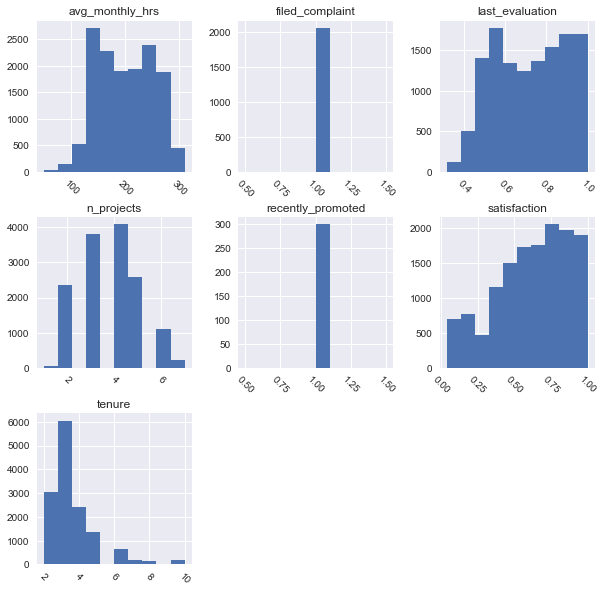

In [9]:
# Plot histogram grid
df.hist(figsize=(10,10),xrot=-45)

# Clear the text "residue"
plt.show()

In [10]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [11]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


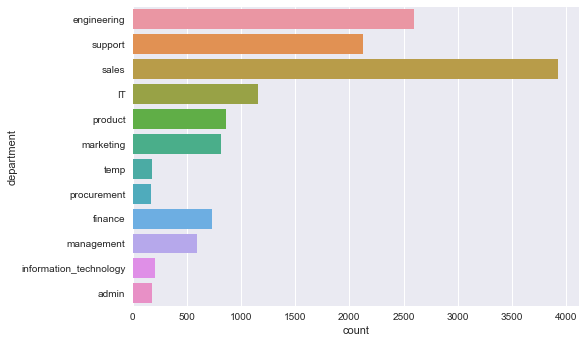

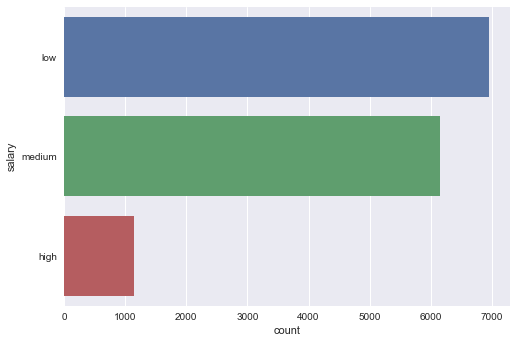

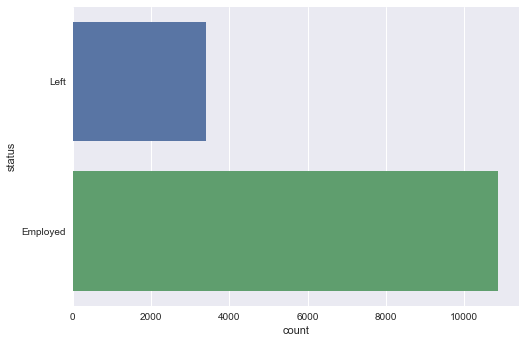

In [12]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

<h2> Segmentations </h2>

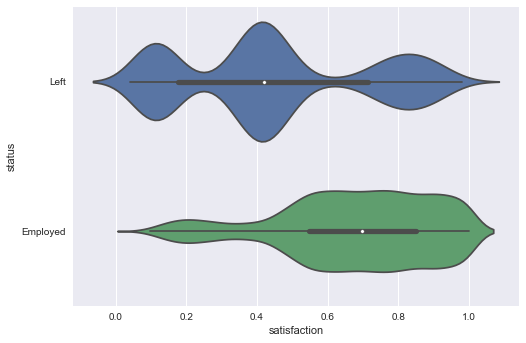

In [13]:
# Segment satisfaction by status and plot distributions
sns.violinplot(x='satisfaction',y='status',data=df)

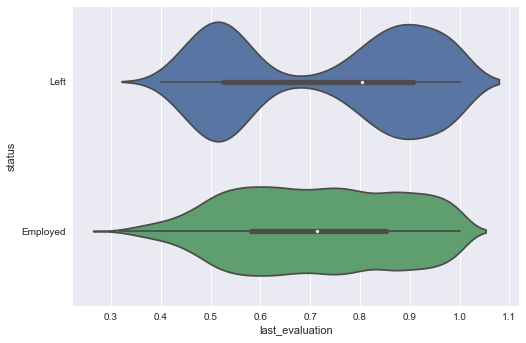

In [14]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(x='last_evaluation',y='status',data=df)

In [15]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


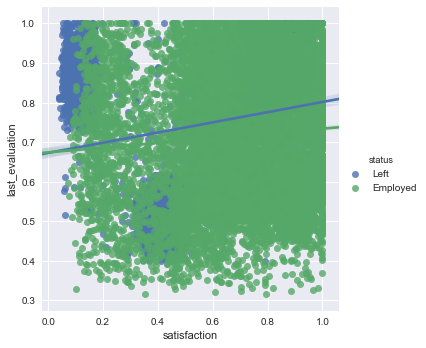

In [16]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df)

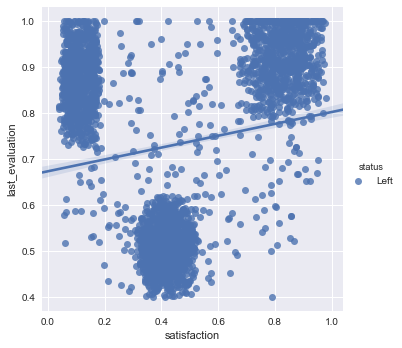

In [17]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df[df.status=='Left'])

<h2> Data cleaning </h2>

In [18]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(14221, 10)


In [19]:
# Unique classes of 'department'
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [20]:
# Drop temporary workers as they don't belong to that department
df = df[df.department != 'temp']
df.shape

(14068, 10)

<h3> Fix Structural Errors </h3>

In [21]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())

# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[ nan   1.]
[ nan   1.]


In [22]:
# Missing filed_complaint values should be 0
df['filed_complaint'] = df.filed_complaint.fillna(0)

# Missing recently_promoted values should be 0
df['recently_promoted'] = df.recently_promoted.fillna(0)

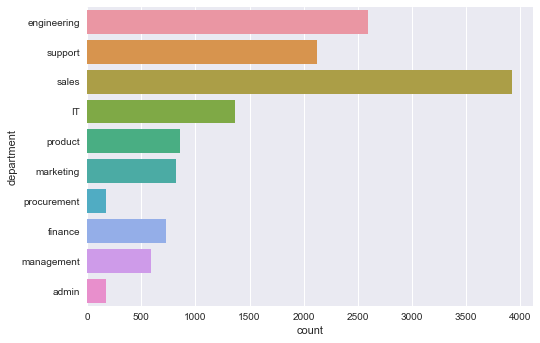

In [23]:
# 'information_technology' should be 'IT'
df.replace('information_technology','IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(y='department',data=df)

<h3> Handle missing data </h3>

In [24]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

Department is a categorical variable that has missing values. So, creating a new class called 'Missing' for department...

In [25]:
# Fill missing values in department with 'Missing'
df['department'] = df.department.fillna('Missing')

Last_evaluation is a continuous value that has missing values. So, creating a new indicator variable called <code>'last_evaluation_missing'</code> that denotes missing values and setting the original missing values to 0 so that algorithms can run properly.

In [26]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df['last_evaluation'].isnull().astype(int)

In [27]:
# Fill missing values in last_evaluation with 0
df['last_evaluation'] = df.last_evaluation.fillna(0)

Again display number of missing values just to confirm...

In [28]:
# Display number of missing values by feature
df.isnull().sum()  

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

Great, now that I am done with data cleaning, let's proceed to feature engineering...

<h2> Feature Engineering </h2>

Let's reproduce the scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code> here, just so we have it in front of us.

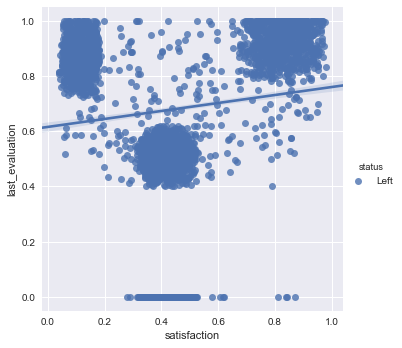

In [29]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=df[df.status=='Left'])

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7

<br>
**Creating those 3 indicator features.**
* **Important:** For <code style="color:steelblue">'underperformer'</code>, it's important to include <code style="color:steelblue">'last_evaluation_missing' == 0</code> to avoid those originally missing observations that we flagged and filled.

In [30]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation_missing == 0) & (df.last_evaluation < 0.6)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever']= ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

Checking to see if features got created correctly.

In [31]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

**Convert <code style="color:steelblue">'status'</code> into an indicator variable.**
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>

In [32]:
 # Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

**To confirm we did that correctly, display the proportion of people in our dataset who left.**

In [33]:
# The proportion of observations who 'Left'
df.status.mean()

0.23933750355416547

In [34]:
# Create new dataframe with dummy features for categorical variables
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


<h3> Save to Analytical Base table </h3>

In [35]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

Load the ABT

In [36]:
# Load analytical base table from Module 2
df = pd.read_csv('analytical_base_table.csv')

Separate X and Y

In [37]:
# Create separate object for target variable
y = df.status

# Create separate object for input features
X = df.drop('status', axis=1)

In [38]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234, stratify=df.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

11254 2814 11254 2814


<h3> Build model pipelines </h3>

In [39]:
# Pipeline dictionary
pipelines = {
    'l1': make_pipeline(StandardScaler(),LogisticRegression(penalty='l1',random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, random_state=123))
}

<h3> Declare hyperparameters to tune </h3>

In [40]:
# List tuneable hyperparameters of our Logistic pipeline
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscal

In [41]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}
l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}

In [42]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

In [43]:
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [44]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

<h3> Fit and tune models with cross validation </h3>

In [46]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)

    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


<h3> Evaluate metrics to pick the best model </h3>

In [48]:
# Display the mean cross-validated score of the best estimator for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.849386884663
l2 0.849386884663
rf 0.979651679403
gb 0.975208814644


<h3> Area under ROC curve </h3>

In [50]:
# First, use the L1-regularized logistic regression to predict classes directly
pred = fitted_models['l1'].predict(X_test)

# Display first 10 predictions
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [51]:
# Display confusion matrix for y_test and pred
print(confusion_matrix(y_test, pred))

[[1969  172]
 [ 221  452]]


In [52]:
# Now predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
pred[:10]

[0.030570070257148078,
 0.004441966482297899,
 0.0072963001932446481,
 0.088097865803861558,
 0.071150950128417309,
 0.48160946301549457,
 0.12604877174578802,
 0.61529468949126898,
 0.72665929094601001,
 0.13703595544287531]

In [53]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [54]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds}).tail(10)

,FPR,TPR,Thresholds
532,0.759925,0.994056,0.009627
533,0.784680,0.994056,0.008120
534,0.784680,0.995542,0.008076
535,0.910322,0.995542,0.001962
536,0.910322,0.997028,0.001950
537,0.932742,0.997028,0.001393
538,0.932742,0.998514,0.001388
539,0.949089,0.998514,0.001051
540,0.949089,1.000000,0.001040
541,1.000000,1.000000,0.000027


We see that as we decrease the threshold, both the false positive rate **and** the true positive rate increase.

Let us plot the entire curve.

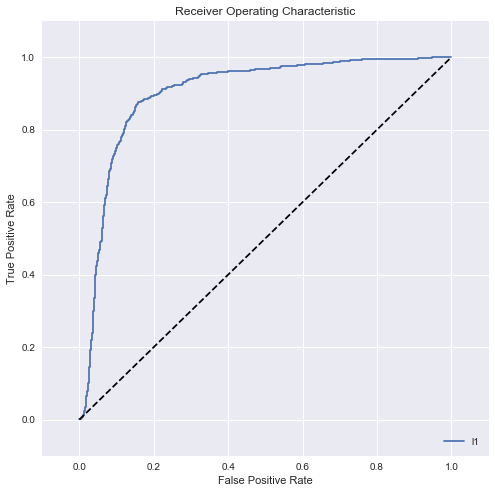

In [55]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate AUROC
print(auc(fpr, tpr))

0.901543001458


This is a pretty good model!

 let's calculate it for each of our fitted models on the test set.

In [57]:
# Code here
for key, value in fitted_models.items():
    pred = fitted_models[key].predict_proba(X_test)
    # Get just the prediction for the positive class (1)
    pred = [p[1] for p in pred]

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(key, auc(fpr, tpr))

l1 0.901543001458
l2 0.901538837374
rf 0.991520189216
gb 0.988680283685


**Finally, save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.**

In [59]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

One nice and quick sanity check we can do is confirm that our model was saved correctly.

<br>
**First, let's display the model object. We're confirming a few key details:**
* It should be a model <code style="color:steelblue">Pipeline</code>.
* The first step should be a <code style="color:steelblue">StandardScaler</code> preprocessing step.
* The second step should be a <code style="color:steelblue">RandomForestClassifier</code> model.

In [60]:
# Display model object
print(model)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
   ...s=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gradientboostingclassifier__n_estimators': [100, 200], 'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2], 'gradientboostingclassifier__max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


<h2> Packaging this </h2>

Write a function called <code style="color:steelblue">clean_data()</code> that bundles together all of the data cleaning steps.

In [61]:
def clean_data(df):
    # Drop duplicates
    df = df.drop_duplicates()
    
    # Drop temporary workers
    df = df[df.department != 'temp']
    
    # Missing filed_complaint values should be 0
    df['filed_complaint'] = df.filed_complaint.fillna(0)

    # Missing recently_promoted values should be 0
    df['recently_promoted'] = df.recently_promoted.fillna(0)
    
    # 'information_technology' should be 'IT'
    df.department.replace('information_technology','IT',inplace=True)

    # Fill missing values in department with 'Missing'
    df['department'].fillna('Missing',inplace=True)

    # Indicator variable for missing last_evaluation
    df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)
    
    # Fill missing values in last_evaluation with 0
    df.last_evaluation.fillna(0, inplace=True)
    
    # Return cleaned dataframe
    return df

Let's load some brand new, **raw data** that we've never seen before.

In [62]:
raw_data = pd.read_csv('unseen_raw_data.csv')

print( raw_data.shape )
raw_data.head()

(750, 9)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,228,management,NaN,0.735618,2,NaN,high,0.805661,3.0
1,229,product,NaN,1.000000,4,NaN,low,0.719961,4.0
2,196,sales,1.0,0.557426,4,NaN,low,0.749835,2.0
3,207,IT,NaN,0.715171,3,NaN,high,0.987447,3.0
4,129,management,NaN,0.484818,2,NaN,low,0.441219,3.0


Let us create a new DataFrame named <code style="color:steelblue">cleaned_data</code> using the function you just wrote.
* Then display its first 5 rows.

In [63]:
# Create cleaned_new_data 
cleaned_data = clean_data(raw_data)

# Display first 5 rows
cleaned_data.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,last_evaluation_missing
0,228,management,0.0,0.735618,2,0.0,high,0.805661,3.0,0
1,229,product,0.0,1.000000,4,0.0,low,0.719961,4.0,0
2,196,sales,1.0,0.557426,4,0.0,low,0.749835,2.0,0
3,207,IT,0.0,0.715171,3,0.0,high,0.987447,3.0,0
4,129,management,0.0,0.484818,2,0.0,low,0.441219,3.0,0


Next, write a function called <code style="color:steelblue">engineer_features()</code> that compiles all of the feature engineering steps.

In [64]:
def engineer_features(df):
    # Create indicator features
    df['underperformer'] = ((df.last_evaluation_missing == 0) & (df.last_evaluation < 0.6)).astype(int)
    df['unhappy'] = (df.satisfaction < 0.2).astype(int)
    df['overachiever']= ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)
    
        
    # Create new dataframe with dummy features
    df = pd.get_dummies(df, columns=['department', 'salary'])
    
    # Return augmented DataFrame
    return df

**Create a new DataFrame named <code style="color:steelblue">augmented_data</code> using the function you just wrote.**
* Then display its first 5 rows.
* Remember to pass in <code style="color:steelblue">cleaned_data</code>, not <code style="color:steelblue">raw_data</code>.

In [66]:
# Create augmented_new_data
augmented_data = engineer_features(cleaned_data)

# Display first 5 rows
augmented_data.head(5)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,228,0.0,0.735618,2,0.0,0.805661,3.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,229,0.0,1.000000,4,0.0,0.719961,4.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,196,1.0,0.557426,4,0.0,0.749835,2.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,207,0.0,0.715171,3,0.0,0.987447,3.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,129,0.0,0.484818,2,0.0,0.441219,3.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


**Predict probabilities for <code style="color:steelblue">augmented_data</code> using your model.**
* Then print the first 5 predictions.

In [68]:
# Predict probabilities
pred = model.predict_proba(augmented_data)

# Print first 5 predictions
print(pred[:5])

[[ 0.98886308  0.01113692]
 [ 0.94699014  0.05300986]
 [ 0.99701079  0.00298921]
 [ 0.99811321  0.00188679]
 [ 0.01347381  0.98652619]]


<h2> Construct a model class </h2>

Great, now let's package these functions together into a single **model class**. 

In [69]:
class CustomerRetentionModel:
    
    def __init__(self, model_location):
        with open(model_location, 'rb') as f:
            self.model = pickle.load(f)
    
    def predict_proba(self, X_new, clean=True, augment=True):
        if clean:
            X_new = self.clean_data(X_new)
        
        if augment:
            X_new = self.engineer_features(X_new)
        
        return X_new, self.model.predict_proba(X_new)
    
    # Add functions here
    def clean_data(self, df):
        # Drop duplicates
        df = df.drop_duplicates()

        # Drop temporary workers
        df = df[df.department != 'temp']

        # Missing filed_complaint values should be 0
        df['filed_complaint'] = df.filed_complaint.fillna(0)

        # Missing recently_promoted values should be 0
        df['recently_promoted'] = df.recently_promoted.fillna(0)

        # 'information_technology' should be 'IT'
        df.department.replace('information_technology','IT',inplace=True)

        # Fill missing values in department with 'Missing'
        df['department'].fillna('Missing',inplace=True)

        # Indicator variable for missing last_evaluation
        df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

        # Fill missing values in last_evaluation with 0
        df.last_evaluation.fillna(0, inplace=True)

        # Return cleaned dataframe
        return df
    def engineer_features(self, df):
        # Create indicator features
        df['underperformer'] = ((df.last_evaluation_missing == 0) & (df.last_evaluation < 0.6)).astype(int)
        df['unhappy'] = (df.satisfaction < 0.2).astype(int)
        df['overachiever']= ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)


        # Create new dataframe with dummy features
        df = pd.get_dummies(df, columns=['department', 'salary'])

        # Return augmented DataFrame
        return df 


<h3> Ways to deploy this model </h3>

<h4> Within Jupyter Notebook </h4>

In [70]:
# Initialize an instance
retention_model = CustomerRetentionModel('final_model.pkl')

If implemented correctly, these next three statements should all work.

In [71]:
# Predict raw data
_, pred1 = retention_model.predict_proba(raw_data, clean=True, augment=True)

# Predict cleaned data
_, pred2 = retention_model.predict_proba(cleaned_data, clean=False, augment=True)

# Predict cleaned and augmented data
_, pred3 = retention_model.predict_proba(augmented_data, clean=False, augment=False)

In [72]:
# Should be true
np.array_equal(pred1, pred2) and np.array_equal(pred2, pred3)

True

<h4> As a script </h4>

Create an executable file <code>retention_model.py</code> and call it from the command line passing these parameters in that order: <code> unseen_raw_data.csv predictions.csv final_model.pkl True True </code>

That's it!